## 练习

[7.03259355 0.04753664] [9.31163809 0.20249578] [12.35140709  0.0546931 ]


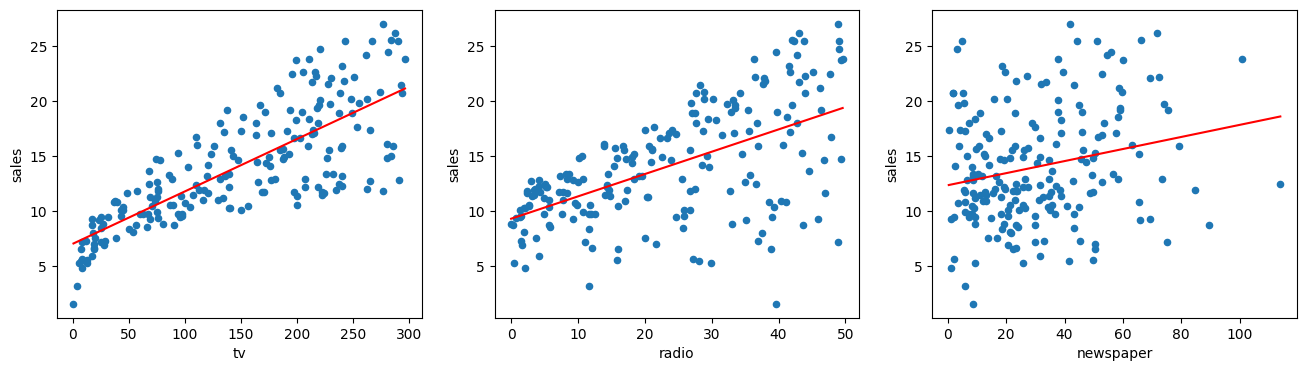

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
%matplotlib inline

data = pd.read_csv('.\\advertising.csv',index_col=0)

p_init = np.random.randn(2)

def func(p, x):
    w0, w1 = p
    f = w0 + w1*x
    return f

def err_func(p, x, y):
    ret = func(p, x) - y
    return ret
    
params_tv = leastsq(err_func, p_init, args=(data.tv, data.sales))
params_radio = leastsq(err_func, p_init, args=(data.radio, data.sales))
params_newspaper = leastsq(err_func, p_init, args=(data.newspaper, data.sales))
### 代码结束 ###

print(params_tv[0], params_radio[0], params_newspaper[0])

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

data.plot(kind='scatter', x='tv', y='sales', ax=axes[0])
data.plot(kind='scatter', x='radio', y='sales', ax=axes[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axes[2])

x_tv = np.array([data.tv.min(), data.tv.max()])
axes[0].plot(x_tv, params_tv[0][1]*x_tv + params_tv[0][0], 'r')

# print(x_tv)
x_radio = np.array([data.radio.min(), data.radio.max()])
axes[1].plot(x_radio, params_radio[0][1]*x_radio + params_radio[0][0], 'r')

x_newspaper = np.array([data.newspaper.min(), data.newspaper.max()])
axes[2].plot(x_newspaper, params_newspaper[0][1] *
             x_newspaper + params_newspaper[0][0], 'r')

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[['tv', 'radio', 'newspaper']], data.sales)
print(model.coef_)
print(model.intercept_)
print(model.score(data[['tv', 'radio', 'newspaper']], data.sales))

[ 0.04576465  0.18853002 -0.00103749]
2.9388893694594103
0.8972106381789522
